# Uber Data Analysis :-

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
df = pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [309]:
df.shape

(1156, 7)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [311]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [312]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Data Preprocessing :-

### Converting the missing rows in `PURPOSE` column from `NANs` to `NOT`.

In [313]:
df['PURPOSE'] = df['PURPOSE'].fillna('NOT')

In [314]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Droping the `na` rows.

In [315]:
df.isna().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [316]:
df.dropna(inplace=True)

In [317]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### Changing the `START_DATE` and `END_DATE` columns format from `Object` to `DateTime`.

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [319]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [321]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [322]:
df.isna().sum()

START_DATE    734
END_DATE      735
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
dtype: int64

In [323]:
df.dropna(inplace=True)

In [324]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     420 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 26.2+ KB


### Adding two more columns `DATE` and `TIME`.

In [326]:
from datetime import datetime

df['DATE'] = pd.DatetimeIndex(df['START_DATE']).date

In [327]:
df['TIME'] = pd.DatetimeIndex(df['START_DATE']).hour

In [328]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month    # Extracting 'MONTH' from 'START_DATE'

month_labels = {
    1.0 : 'January', 2.0 : 'February', 3.0 : 'March', 4.0 : 'April',
    5.0 : 'May', 6.0 : 'June', 7.0 : 'July', 8.0 : 'August',
    9.0 : 'September', 10.0 : 'October', 11.0 : 'November', 12.0 : 'December'
}       # replaceing month numbers to string

df['MONTH'] = df.MONTH.map(month_labels)     # mapping --> number to string

In [329]:
df['DAYS_OF_WEEK'] = pd.DatetimeIndex(df['START_DATE']).dayofweek

weekdays_label = {
    0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',
    3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'
}

df['DAYS_OF_WEEK'] = df.DAYS_OF_WEEK.map(weekdays_label)

In [330]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,MONTH,DAYS_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,January,Wednesday


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   START_DATE    420 non-null    datetime64[ns]
 1   END_DATE      420 non-null    datetime64[ns]
 2   CATEGORY      420 non-null    object        
 3   START         420 non-null    object        
 4   STOP          420 non-null    object        
 5   MILES         420 non-null    float64       
 6   PURPOSE       420 non-null    object        
 7   DATE          420 non-null    object        
 8   TIME          420 non-null    int32         
 9   MONTH         420 non-null    object        
 10  DAYS_OF_WEEK  420 non-null    object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 37.7+ KB


### Adding one more column named `DAY-NIGHT` to categorize the `TIME` column.

In [332]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,MONTH,DAYS_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,January,Wednesday


In [333]:
df['DAY-NIGHT'] = pd.cut(x=df['TIME'], bins=[0,10,15,19,24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

In [334]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,MONTH,DAYS_OF_WEEK,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,January,Friday,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,January,Saturday,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,January,Saturday,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,January,Tuesday,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,January,Wednesday,Afternoon


In [335]:
df.shape

(420, 12)

In [336]:
df.duplicated().sum()

0

# Data Visualization :-

## Providing answers to all the questions given below to the company :-

### 1. In which `CATEGORY` do people book the most Uber rides?

In [337]:
df['CATEGORY'].value_counts()

CATEGORY
Business    407
Personal     13
Name: count, dtype: int64

### 2. For which `PURPOSE` do people book Uber rides the most?

In [338]:
df['PURPOSE'].value_counts()

PURPOSE
NOT                159
Meeting             81
Meal/Entertain      64
Errand/Supplies     47
Customer Visit      46
Temporary Site      14
Between Offices      9
Name: count, dtype: int64

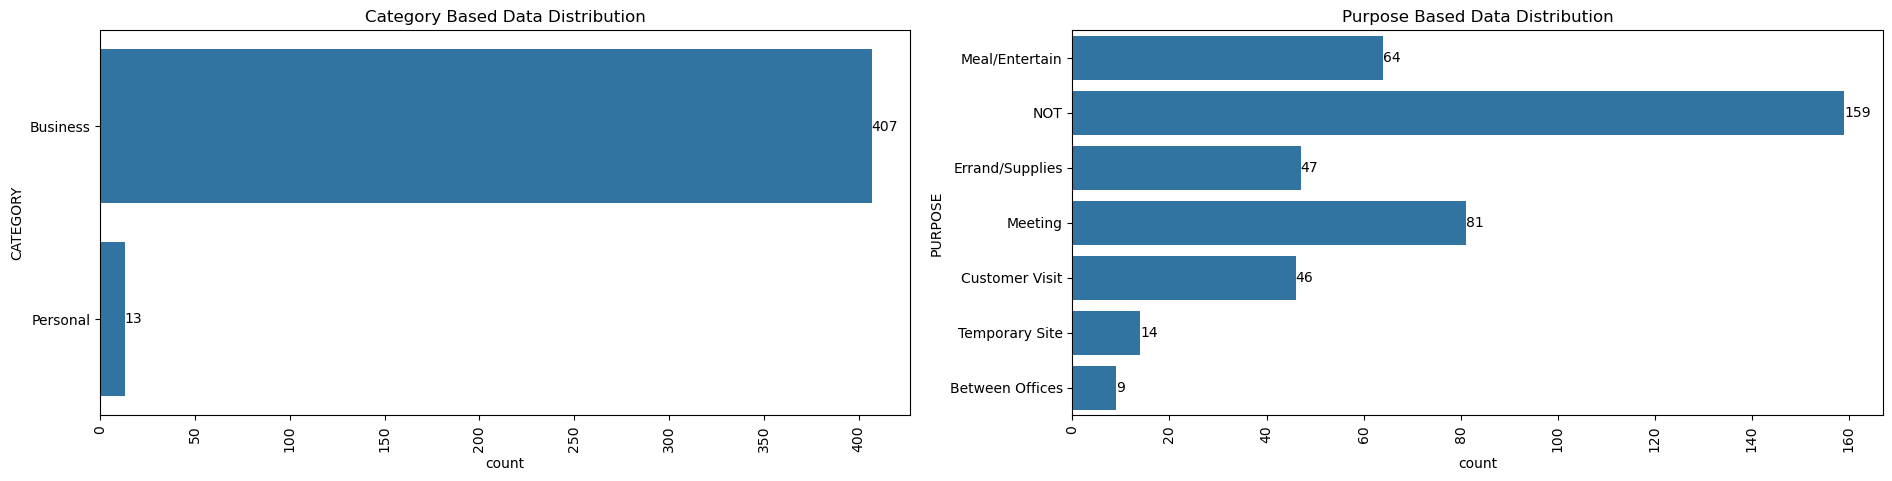

In [339]:
plt.figure(figsize=(23,5))

plt.subplot(1,2,1)

ax = sns.countplot(df['CATEGORY'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Category Based Data Distribution")

plt.subplot(1,2,2)

ax = sns.countplot(df['PURPOSE'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Purpose Based Data Distribution")

plt.show()

### 3. At what `TIME` do people book cabs the most from Uber?

In [340]:
df['DAY-NIGHT'].value_counts()

DAY-NIGHT
Afternoon    142
Evening      137
Night         71
Morning       63
Name: count, dtype: int64

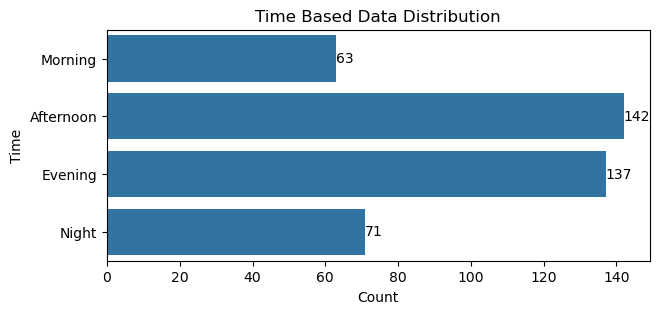

In [341]:
plt.figure(figsize=(7,3))
ax = sns.countplot(df['DAY-NIGHT'])
ax.set(xlabel='Count', ylabel='Time')
ax.bar_label(ax.containers[0])
plt.title("Time Based Data Distribution")
plt.show()

### 4. In which `MONTHS` do people book Uber rides less frequently?

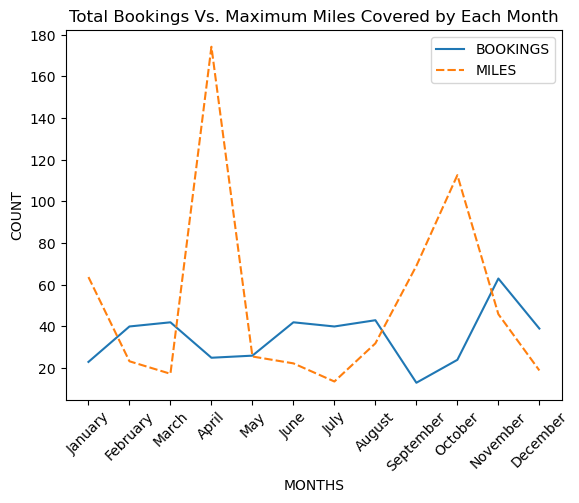

In [342]:
df1 = pd.DataFrame({
    'BOOKINGS' : df['MONTH'].value_counts(sort=False).values,            # total count of each Month
    'MILES' : df.groupby('MONTH', sort=False)['MILES'].max()             # maximum miles travelled of each month
})

p = sns.lineplot(data=df1)
p.set(xlabel="MONTHS", ylabel="COUNT")
plt.xticks(rotation=45)
plt.title("Total Bookings Vs. Maximum Miles Covered by Each Month")
plt.show()

### 5. On which `Days Of The Week` do people book Uber rides the most?

In [343]:
df['DAYS_OF_WEEK'].value_counts()

DAYS_OF_WEEK
Friday       87
Monday       62
Thursday     61
Tuesday      60
Saturday     52
Wednesday    50
Sunday       48
Name: count, dtype: int64

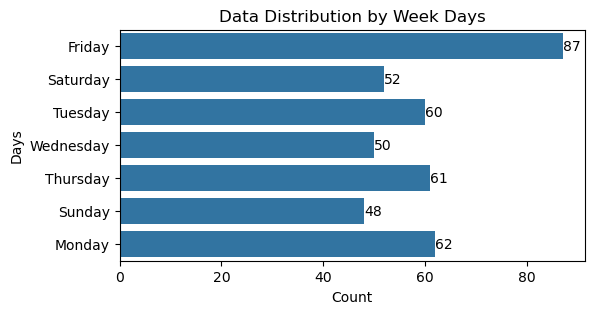

In [348]:
plt.figure(figsize=(6,3))
p = sns.countplot(df['DAYS_OF_WEEK'])
p.bar_label(p.containers[0])
p.set(xlabel='Count', ylabel='Days')
plt.title("Data Distribution by Week Days")
plt.show()

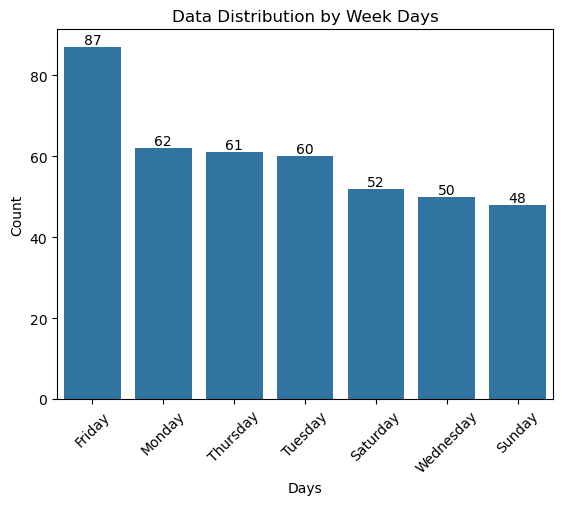

In [349]:
p = sns.barplot(x=df['DAYS_OF_WEEK'].value_counts().index, y=df['DAYS_OF_WEEK'].value_counts())
p.bar_label(p.containers[0])
p.set(xlabel='Days', ylabel='Count')
plt.xticks(rotation=45)
plt.title("Data Distribution by Week Days")
plt.show()

### 6. How many `MILES` do people usually book a cab for through Uber?

In [350]:
df['MILES'].describe()

count    420.000000
mean       9.083810
std       16.386685
min        0.500000
25%        2.775000
50%        5.700000
75%        9.900000
max      174.200000
Name: MILES, dtype: float64

In [351]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,MONTH,DAYS_OF_WEEK,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,January,Friday,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,January,Saturday,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,January,Saturday,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,January,Tuesday,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,January,Wednesday,Afternoon


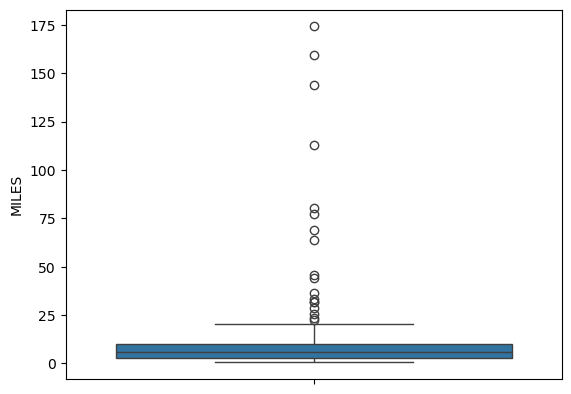

In [352]:
sns.boxplot(df['MILES'])

plt.show()

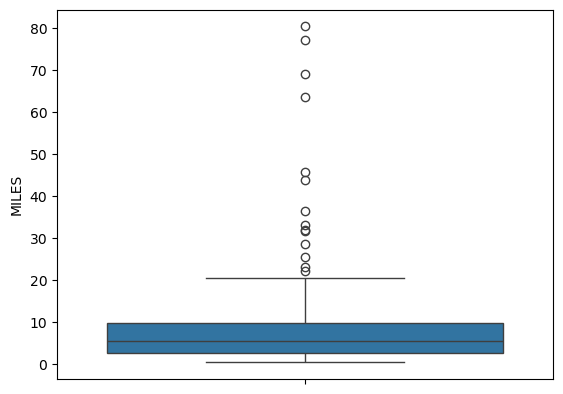

In [354]:
sns.boxplot(df[df['MILES']<100]['MILES'])

plt.show()

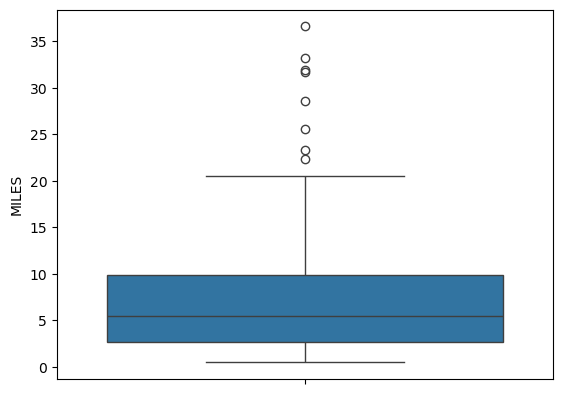

In [355]:
sns.boxplot(df[df['MILES']<40]['MILES'])

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8568\2681818906.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'], kde=True)


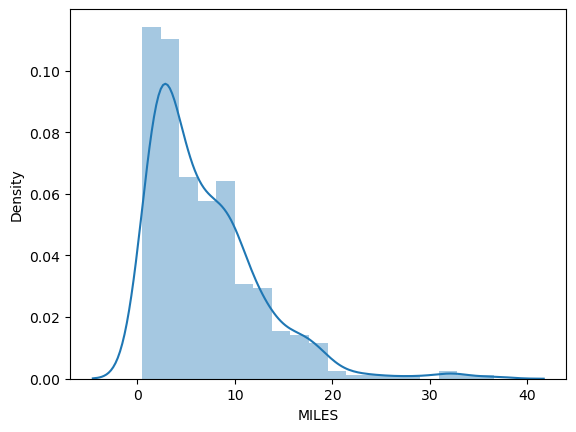

In [363]:
sns.distplot(df[df['MILES']<40]['MILES'], kde=True)

plt.show()

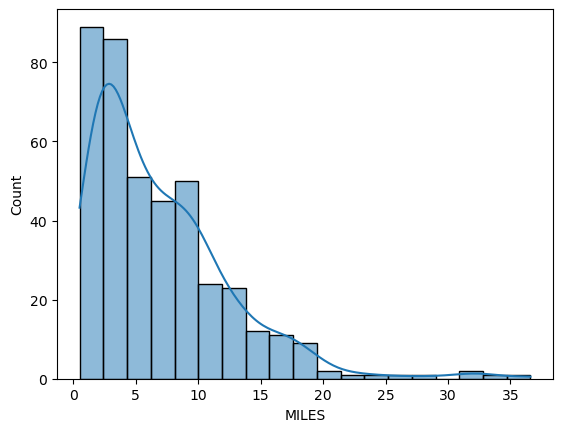

In [362]:
sns.histplot(df[df['MILES']<40]['MILES'], kde=True)

plt.show()